In [74]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [75]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [76]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

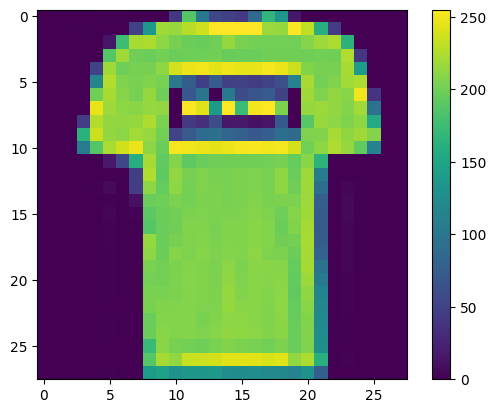

In [78]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Now we will scale these values ​​to a range of 0 to 1 before passing them to the neural network model. To do this, we need to divide the values ​​by 255. The training set and the test set should be preprocessed in the same way:

In [79]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

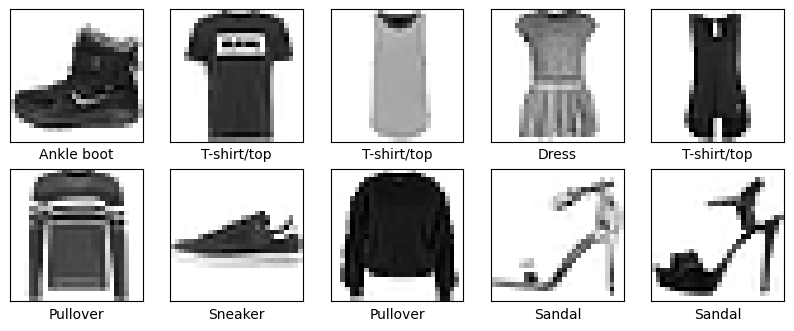

In [80]:
# verifying 10 images and classes under each imgs
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([]) 
    plt.imshow(train_images_scaled[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


In [ ]:
# Image classification model building using tensorflow

In [81]:
# Setting up layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    # Input layer
    keras.layers.Dense(500, activation='relu'),
    # output layer
    keras.layers.Dense(10, activation='sigmoid')
])

In [82]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
model.fit(train_images_scaled, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4759 - accuracy: 0.8298
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3595 - accuracy: 0.8687
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3224 - accuracy: 0.8809
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2969 - accuracy: 0.8904
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2801 - accuracy: 0.8964
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2645 - accuracy: 0.9023
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2522 - accuracy: 0.9052
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2414 - accuracy: 0.9097
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2300 - accuracy: 0.9140
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.

In [83]:
test_loss, test_acc = model.evaluate(test_images_scaled,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3302 - accuracy: 0.8838 - 591ms/epoch - 2ms/step

Test accuracy: 0.8838000297546387


overfitting issue coz performs well with train data not with test data

# 88% accuracy with adam optimizer

In [ ]:
# verify prediction

In [84]:
class_names[test_labels[0]]

'Ankle boot'

In [85]:
class_names[np.argmax(model.predict(test_images_scaled)[0])] 

313/313 [==============================] - 1s 2ms/step


'Ankle boot'

predicts perfect

In [86]:
class_names[np.argmax(model.predict(test_images_scaled)[1])]

313/313 [==============================] - 1s 2ms/step


'Pullover'

In [87]:
class_names[test_labels[1]]

'Pullover'

predicts correct

In [88]:
class_names[np.argmax(model.predict(test_images_scaled)[96])]

313/313 [==============================] - 1s 2ms/step


'T-shirt/top'

In [89]:
class_names[test_labels[96]]

'T-shirt/top'

In [90]:
# again
class_names[np.argmax(model.predict(test_images_scaled)[0])]

313/313 [==============================] - 1s 2ms/step


'Ankle boot'

In [91]:
class_names[test_labels[0]] # predicts wrong

'Ankle boot'

In [92]:
class_names[np.argmax(model.predict(test_images_scaled)[3000])]

313/313 [==============================] - 1s 2ms/step


'Trouser'

In [93]:
class_names[test_labels[3000]] # predicts perfect

'Trouser'

check with SGD optimizer

In [94]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images_scaled, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1806 - accuracy: 0.9336
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1736 - accuracy: 0.9359
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1706 - accuracy: 0.9371
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1686 - accuracy: 0.9381
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1667 - accuracy: 0.9387
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1652 - accuracy: 0.9391
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1637 - accuracy: 0.9393
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1628 - accuracy: 0.9402
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1615 - accuracy: 0.9411
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.160

In [95]:
model.evaluate(test_images_scaled,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3077 - accuracy: 0.8979 - 584ms/epoch - 2ms/step


[0.3076941668987274, 0.8978999853134155]

In [96]:
test_loss, test_acc = model.evaluate(test_images_scaled,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3077 - accuracy: 0.8979 - 537ms/epoch - 2ms/step

Test accuracy: 0.8978999853134155


### 89% accuracy with SGD optimizers

In [97]:
class_names[np.argmax(model.predict(test_images_scaled)[11])] 

313/313 [==============================] - 1s 2ms/step


'Sandal'

In [98]:
class_names[test_labels[11]] 

'Sandal'